# Проведение А/Б-теста в интернет-магазине
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты для увеличения выручки интернет-магазина


In [681]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import math as mt
import re

# Options for pandas
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 300


In [682]:
hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

# Приоритизация гипотез

In [683]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [684]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']


In [685]:
hypothesis.sort_values('ICE', ascending=False)
hypothesis.sort_values('RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Гипотезы с индексами 1, 3, 4, 5 имеют низкие показатели как ICE, так и RICE. 0 и 7 остаются в топ-3, 6 - на том же месте, а гипотеза 8 стоит на 1 месте для ICE, так как не учитывается компонента Reach, а в RICE она стоит уже на 5 месте, потому что Reach равен 1. 2 гипотеза, наоборот, благодаря Reach перешла с 5 на 2 место

# Анализ A/B-теста

In [686]:
[display(i.info(), i.head()) for i in [orders, visitors]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


[None, None]

In [687]:
orders.duplicated().sum()
visitors.duplicated().sum()

0

0

Явных дубликатов нет. Необходимо привести дату к соответствующему типу и проверить, есть ли пользователи, попавшие в обе группы теста в одну дату одновременно

In [688]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [689]:
dup = orders[orders['visitorId'].duplicated(keep=False)].sort_values('visitorId')

dup.head()

dup[dup[['visitorId', 'date', 'group']].duplicated(keep = False)]

,transactionId,visitorId,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A
1102,1941707234,199603092,2019-08-12,6438,A
823,2971973105,199603092,2019-08-27,2790,A
134,62794304,199603092,2019-08-22,6976,A


,transactionId,visitorId,date,revenue,group
94,252633006,457167155,2019-08-22,5970,B
95,372616894,457167155,2019-08-22,987,B
144,365058890,611059232,2019-08-01,2750,A
145,735232225,611059232,2019-08-01,8800,A
104,627804981,611059232,2019-08-01,17600,A
675,2658936877,1230306981,2019-08-09,6440,B
674,1748608673,1230306981,2019-08-09,6400,B
739,2541955961,1230306981,2019-08-09,10137,A
676,278311817,1230306981,2019-08-09,1690,A
672,3667885894,1230306981,2019-08-09,6613,A


Есть 260 случаев, когда пользователи совершали заказы не менее 2-х раз. Среди них все, кто совершал несколько заказов в один день, принадлежат одной и той же группе

## График кумулятивной выручки по группам

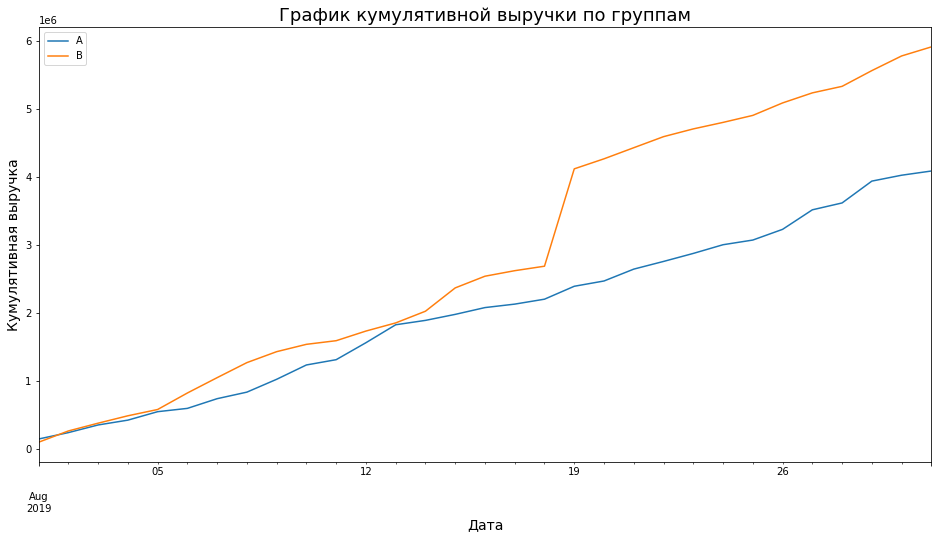

In [690]:
np.cumsum(orders.query('group == "A"').groupby('date')['revenue'].sum()).plot(figsize = (16, 8), label = 'A')
np.cumsum(orders.query('group == "B"').groupby('date')['revenue'].sum()).plot(figsize = (16, 8), label = 'B')
plt.title('График кумулятивной выручки по группам', fontsize = '18')
plt.xlabel('Дата', fontsize = '14')
plt.ylabel('Кумулятивная выручка', fontsize = '14')
plt.legend()
plt.show();

Кумулятивная выручка от пользователей из группы B больше на всем периоде проведения теста, чем от пользователей из группы A, возможно изменения действительно повлияли на увеличение выручки

## График кумулятивного среднего чека по группам

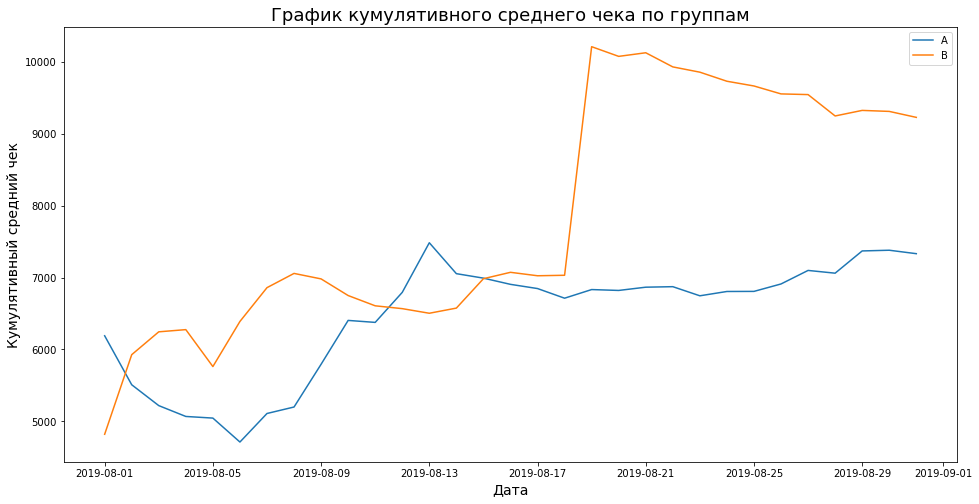

In [691]:
a = orders.query('group == "A"').groupby('date', as_index=False)\
    .agg({"transactionId": 'count', 'revenue': 'sum'})\
    .sort_values(by='date')\
    .assign(aov_daily=lambda row: row['revenue'] / row['transactionId'],
            aov_cum_daily=lambda row: row['revenue'].cumsum() / row['transactionId'].cumsum()
           )[['date', 'aov_cum_daily']]

b = orders.query('group == "B"').groupby('date', as_index=False)\
    .agg({"transactionId": 'count', 'revenue': 'sum'})\
    .sort_values(by='date')\
    .assign(aov_daily=lambda row: row['revenue'] / row['transactionId'],
            aov_cum_daily=lambda row: row['revenue'].cumsum() / row['transactionId'].cumsum()
           )[['date', 'aov_cum_daily']]

fig, ax = plt.subplots(figsize = (16, 8))

ax.plot(a['date'], a['aov_cum_daily'], label = 'A')
ax.plot(b['date'], b['aov_cum_daily'], label = 'B')


plt.title('График кумулятивного среднего чека по группам', fontsize = '18')
plt.xlabel('Дата', fontsize = '14')
plt.ylabel('Кумулятивный средний чек', fontsize = '14')
plt.legend()
plt.show();

Кумулятивный средний чек также больше у группы B почти на всем временном промежутке, вероятно изменения повлияли и на увеличение среднего чека

## График относительного изменения кумулятивного среднего чека

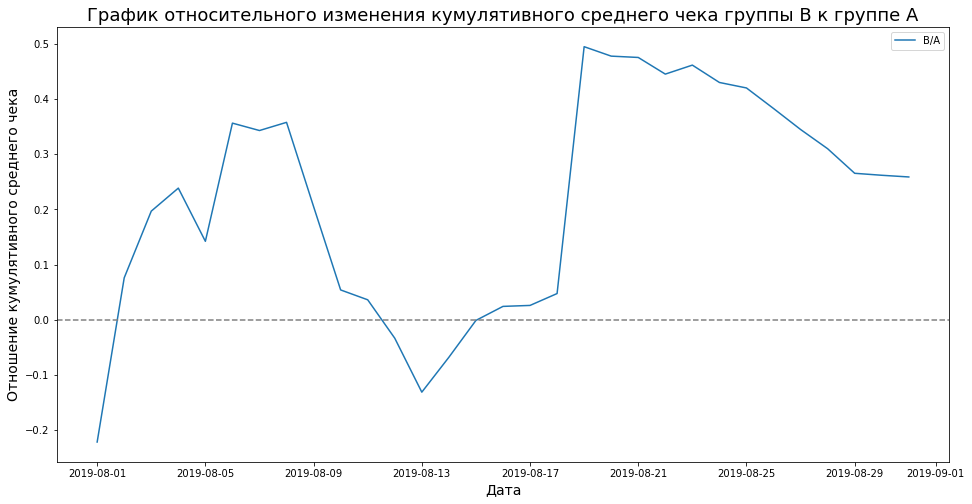

In [692]:
a = orders.query('group == "A"').groupby('date', as_index=False)\
    .agg({"transactionId": 'count', 'revenue': 'sum'})\
    .sort_values(by='date')\
    .assign(aov_daily=lambda row: row['revenue'] / row['transactionId'],
            aov_cum_daily=lambda row: row['revenue'].cumsum() / row['transactionId'].cumsum()
           )[['date', 'aov_cum_daily']]

b = orders.query('group == "B"').groupby('date', as_index=False)\
    .agg({"transactionId": 'count', 'revenue': 'sum'})\
    .sort_values(by='date')\
    .assign(aov_daily=lambda row: row['revenue'] / row['transactionId'],
            aov_cum_daily=lambda row: row['revenue'].cumsum() / row['transactionId'].cumsum()
           )[['date', 'aov_cum_daily']]

fig, ax = plt.subplots(figsize = (16, 8))

ax.plot(b['date'], b['aov_cum_daily'] / a['aov_cum_daily'] - 1, label = 'B/A')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize = '18')
plt.xlabel('Дата', fontsize = '14')
plt.ylabel('Отношение кумулятивного среднего чека', fontsize = '14')
plt.axhline(0, c = 'grey', ls = '--')
plt.legend()
plt.show();

В период с 12 по 15 августа отношение становится ниже 0, то есть кумулятивный средний чек пользователей группы B стал меньше, чем у пользователей группы A, у которых, вероятно, вырос средний чек

## График кумулятивной конверсии по группам

In [693]:
order_conver = orders.groupby(['date', 'group'], as_index=True)[['visitorId']].count().reset_index()\
    .sort_values(['group', 'date']).rename(columns = {'visitorId': 'total_orders'}) \

visitors = visitors.merge(order_conver, on = ['date', 'group'])
visitors.head()

,date,group,visitors,total_orders
0,2019-08-01,A,719,24
1,2019-08-02,A,619,20
2,2019-08-03,A,507,24
3,2019-08-04,A,717,16
4,2019-08-05,A,756,25


In [694]:
a = visitors.query('group == "A"').assign(conversion=lambda row: row['total_orders'] / row['visitors'] * 100,
                conversion_cum=lambda row: row['total_orders'].cumsum() / row['visitors'].cumsum() * 100
               )

b = visitors.query('group == "B"').assign(conversion=lambda row: row['total_orders'] / row['visitors'] * 100,
                conversion_cum=lambda row: row['total_orders'].cumsum() / row['visitors'].cumsum() * 100
               )

visitors = visitors.merge(pd.concat([a, b]), on = ['date', 'group', 'visitors', 'total_orders'])

visitors.head()

,date,group,visitors,total_orders,conversion,conversion_cum
0,2019-08-01,A,719,24,3.337969,3.337969
1,2019-08-02,A,619,20,3.231018,3.288490
2,2019-08-03,A,507,24,4.733728,3.685637
3,2019-08-04,A,717,16,2.231520,3.278689
4,2019-08-05,A,756,25,3.306878,3.285112


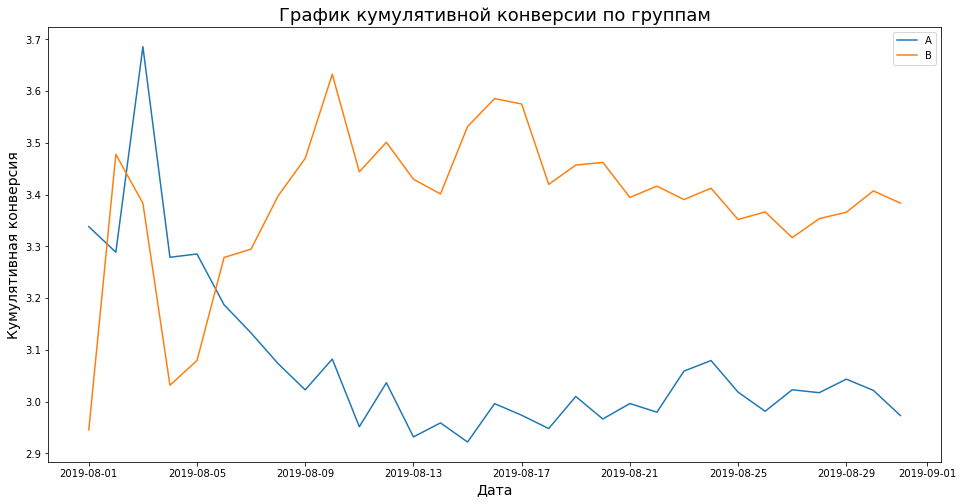

In [695]:
fig, ax = plt.subplots(figsize = (16, 8))

ax.plot(a['date'], a['conversion_cum'], label = 'A')
ax.plot(b['date'], b['conversion_cum'], label = 'B')

plt.title('График кумулятивной конверсии по группам', fontsize = '18')
plt.xlabel('Дата', fontsize = '14')
plt.ylabel('Кумулятивная конверсия', fontsize = '14')
plt.legend()
plt.show();

Сначала у пользователей группы A показатели кумулятивной конверсии были выше, но затем заметно начали снижаться, а с 9 августа стабильно растут показатели группы B

## График относительного изменения кумулятивной конверсии 

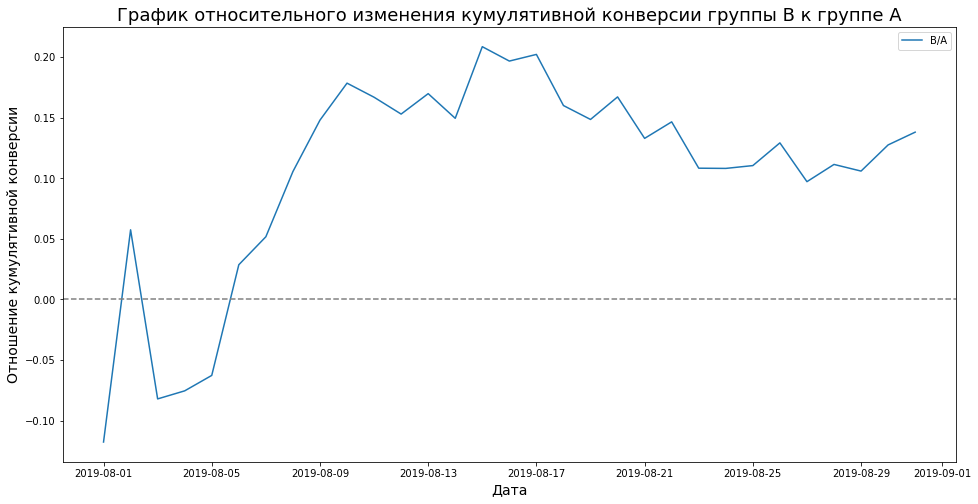

In [696]:
fig, ax = plt.subplots(figsize = (16, 8))

ax.plot(b['date'], b['conversion_cum'].reset_index().drop(['index'], axis=1)\
        / a['conversion_cum'].reset_index().drop(['index'], axis=1) - 1, label = 'B/A')

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', fontsize = '18')
plt.xlabel('Дата', fontsize = '14')
plt.ylabel('Отношение кумулятивной конверсии', fontsize = '14')
plt.axhline(0, c = 'grey', ls = '--')
plt.legend()
plt.show();

До 9 августа в основном отношение кумулятивной конверсии было ниже 0, т.е. показатели группы A были лучше, затем видно стабильное значение относительной конверсии

## Точечный график количества заказов по пользователям

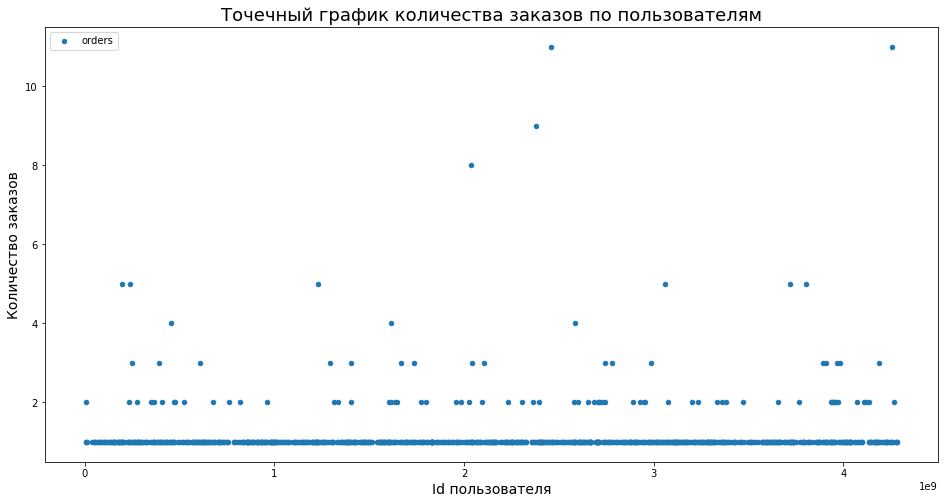

In [697]:
(orders.groupby('visitorId', as_index=False)['transactionId'].count())\
    .plot(kind = 'scatter', x = 'visitorId', y = 'transactionId', figsize = (16, 8), label = 'orders')
plt.title('Точечный график количества заказов по пользователям', fontsize = '18')
plt.xlabel('Id пользователя', fontsize = '14')
plt.ylabel('Количество заказов', fontsize = '14')
plt.legend()
plt.show();


У большинства пользователей по 1 заказу, у небольшого количества - от 2 до 4, еще у 10 пользователей более 4 заказов

In [698]:
orders.groupby('visitorId', as_index=False)['transactionId']\
    .count()['transactionId'].describe(percentiles = [0.95, 0.975, 0.99]).to_frame()

,transactionId
count,1031.000000
mean,1.161009
std,0.724919
min,1.000000
50%,1.000000
95%,2.000000
97.5%,3.000000
99%,4.000000
max,11.000000


У 5% процентов пользователей больше 2-х заказов, у 1% процента - больше 4-х заказов. Пользователей, у которых больше 3-х заказов, можно считать аномальными, поэтому граница будет 97.5%

## Точечный график стоимостей заказов

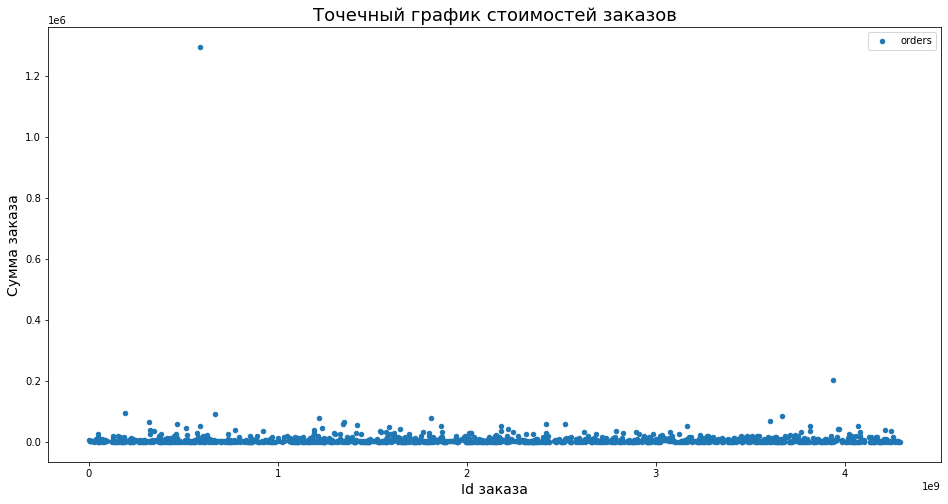

In [699]:
(orders.groupby('transactionId', as_index=False)['revenue'].sum())\
    .plot(kind = 'scatter', x = 'transactionId', y = 'revenue', figsize = (16, 8), label = 'orders')
plt.title('Точечный график стоимостей заказов', fontsize = '18')
plt.xlabel('Id заказа', fontsize = '14')
plt.ylabel('Сумма заказа', fontsize = '14')
plt.legend()
plt.show();



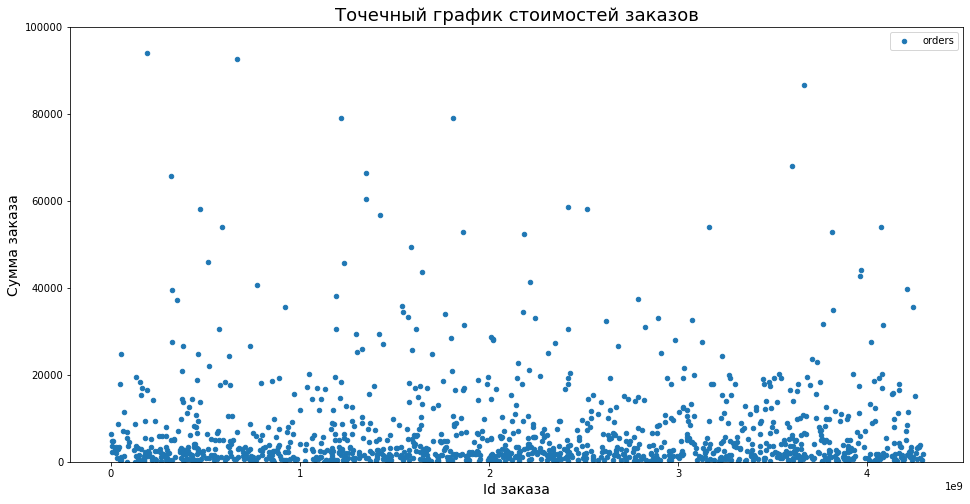

In [700]:
(orders.groupby('transactionId', as_index=False)['revenue'].sum())\
    .plot(kind = 'scatter', x = 'transactionId', y = 'revenue', figsize = (16, 8), label = 'orders')
plt.title('Точечный график стоимостей заказов', fontsize = '18')
plt.xlabel('Id заказа', fontsize = '14')
plt.ylabel('Сумма заказа', fontsize = '14')
plt.ylim(0, 100000)
plt.legend()
plt.show();



Есть несколько значимых выбросов больше 100 000, стоимость большинства закзов меньше 20000

In [701]:
orders.groupby('transactionId', as_index=False)['revenue']\
    .sum()['revenue'].describe(percentiles = [0.95, 0.975, 0.99]).apply("{0:.2f}".format).to_frame()

,revenue
count,1197.00
mean,8348.01
std,39191.13
min,50.00
50%,2978.00
95%,28000.00
97.5%,39530.00
99%,58233.20
max,1294500.00


Здесь можно выбрать границу для определения аномальных заказов в 95%, все, что больше 28000 - аномалии

## Статистическая значимость различий в конверсии между группами по «сырым» данным

In [702]:
group_conver = visitors.groupby('group', as_index=False)[['total_orders', 'visitors']].sum()
group_conver['conversion'] = group_conver['total_orders'] / group_conver['visitors'] * 100

group_conver

,group,total_orders,visitors,conversion
0,A,557,18736,2.972886
1,B,640,18916,3.383379


Пользователи распределились почти равномерно по группам, с разницей менее 1%

Необходимо проверить распределение конверсий на нормальность критерием Шапиро-Уилка

In [703]:
alpha = .05 # критический уровень статистической значимости
results = st.shapiro(visitors['conversion'])
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу, распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, распределение нормально")

p-значение:  0.3749161660671234
Не получилось отвергнуть нулевую гипотезу, распределение нормально


Теперь проверка статистической значимости различий в конверсии между группами

- H0: между конверсиями 2-х групп нет значимой разницы 
- H1: между конверсиями 2-х групп есть значимая разница
- Пусть уровень статистической значимости будет a = 0.05

In [704]:
alpha = 0.05
 
p1 = group_conver['total_orders'][0] / group_conver['visitors'][0]  
p2 = group_conver['total_orders'][1] / group_conver['visitors'][1]  
p_combined = (group_conver['total_orders'][0] + group_conver['total_orders'][1])\
    / (group_conver['visitors'][0] + group_conver['visitors'][1])

difference = p1 - p2

In [705]:
z_value = difference \
    / mt.sqrt(p_combined * (1 - p_combined) * (1/group_conver['visitors'][0] + 1/group_conver['visitors'][1]))

distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2


print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между конверсиями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать конверсии разными")

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу: между конверсиями есть значимая разница


Для «сырых» данных разница в конверсиях получилась статистически значимой, вероятно это из-за оставленных аномалий

## Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Средний чек заказа по группам

In [706]:
orders.groupby('group', as_index=False)['revenue'].mean()

,group,revenue
0,A,7333.578097
1,B,9230.875000


Также необходимо проверить распределение выручки на нормальность

In [707]:
alpha = .05
results = st.shapiro(orders['revenue'])
p_value = results[1]
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу, распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, распределение нормально")

p-значение:  0.0
Отвергаем нулевую гипотезу, распределение не нормально


Так как распределение не нормально, то оценить статистическую значимость различий в среднем чеке по парметрическим критериям нельзя, но можно применить U-критерий Манна-Уитни

In [708]:
alpha = .05 # критический уровень статистической значимости 
results = st.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'], alternative="two-sided")
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Выборки по группам не имеют статистически значимого различия

## Статистическая значимость различий в конверсии между группами по «очищенным» данным

In [709]:
a = orders.groupby('visitorId', as_index=False)['transactionId']\
        .count().rename(columns = {'transactionId': 'total_orders'})

orders_cleaned = orders[(orders.merge(a, on = 'visitorId', how = 'left')['total_orders'] \
       <= np.percentile(np.array(a['total_orders']), 97.5)) \
       & (orders['revenue'] <= np.percentile(np.array(orders['revenue']), 95))]


orders_cleaned.head() # очищенные данные с пользователями, совершившими не более 3 заказов, 
                      # а сумма заказа не превышает 28000

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [710]:
order_cleaned_conver = orders_cleaned.groupby(['date', 'group'], as_index=True)[['visitorId']].count().reset_index()\
    .sort_values(['group', 'date']).rename(columns = {'visitorId': 'cleaned_total_orders'})

order_cleaned_conver.head()


,date,group,cleaned_total_orders
0,2019-08-01,A,21
2,2019-08-02,A,20
4,2019-08-03,A,24
6,2019-08-04,A,13
8,2019-08-05,A,25


In [711]:
visitors = visitors.merge(order_cleaned_conver, on = ['date', 'group'])
visitors['cleaned_conversion'] = visitors['cleaned_total_orders'] / visitors['visitors'] * 100
visitors.head()

,date,group,visitors,total_orders,conversion,conversion_cum,cleaned_total_orders,cleaned_conversion
0,2019-08-01,A,719,24,3.337969,3.337969,21,2.920723
1,2019-08-02,A,619,20,3.231018,3.288490,20,3.231018
2,2019-08-03,A,507,24,4.733728,3.685637,24,4.733728
3,2019-08-04,A,717,16,2.231520,3.278689,13,1.813110
4,2019-08-05,A,756,25,3.306878,3.285112,25,3.306878


In [712]:
group_conver = visitors.groupby('group', as_index=False)[['cleaned_total_orders', 'visitors']].sum()
group_conver['cleaned_conversion'] = group_conver['cleaned_total_orders'] / group_conver['visitors'] * 100

group_conver

,group,cleaned_total_orders,visitors,cleaned_conversion
0,A,492,18736,2.625961
1,B,569,18916,3.008036


Необходимо проверить распределение конверсий на нормальность критерием Шапиро-Уилка

In [713]:
alpha = .05 # критический уровень статистической значимости
results = st.shapiro(visitors['cleaned_conversion'])
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу, распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, распределение нормально")

p-значение:  0.11763975769281387
Не получилось отвергнуть нулевую гипотезу, распределение нормально


Теперь проверка статистической значимости различий в конверсии между группами

- H0: между конверсиями 2-х групп нет значимой разницы 
- H1: между конверсиями 2-х групп есть значимая разница
- Пусть уровень статистической значимости будет a = 0.05

In [714]:
alpha = 0.05
 
p1 = group_conver['cleaned_total_orders'][0] / (group_conver['visitors'][0])  
p2 = group_conver['cleaned_total_orders'][1] / (group_conver['visitors'][1])  
p_combined = (group_conver['cleaned_total_orders'][0] + group_conver['cleaned_total_orders'][1])\
    / (group_conver['visitors'][0] + group_conver['visitors'][1])

difference = p1 - p2

In [715]:
z_value = difference \
    / mt.sqrt(p_combined * (1 - p_combined) * (1/group_conver['visitors'][0] + 1/group_conver['visitors'][1]))

distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2


print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между конверсиями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать конверсии разными")

p-значение:  0.025090028609001447
Отвергаем нулевую гипотезу: между конверсиями есть значимая разница


Для «очищенных» данных разница в конверсиях также получилась статистически значимой, скорее всего аномальные заказы не повлияли на разницу в конверсиях, значит увеличение конверсии в группе B не случайно  

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Средний чек заказа по группам

In [716]:
orders_cleaned.groupby('group', as_index=False)['revenue'].mean()

,group,revenue
0,A,5292.164634
1,B,5104.455185


Также необходимо проверить распределение выручки на нормальность

In [717]:
alpha = .05
results = st.shapiro(orders_cleaned['revenue'])
p_value = results[1]
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу, распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, распределение нормально")

p-значение:  1.1874415749005912e-35
Отвергаем нулевую гипотезу, распределение не нормально


Так как распределение не нормально, то оценить статистическую значимость различий в среднем чеке по парметрическим критериям нельзя, но можно применить U-критерий Манна-Уитни

In [718]:
alpha = .05 # критический уровень статистической значимости 
results = st.mannwhitneyu(orders_cleaned.query('group == "A"')['revenue'], orders_cleaned.query('group == "B"')['revenue'], alternative="two-sided")
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.7233411784863508
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Выборки по «очищенным» данным в группах также не имеют статистически значимого различия

# Выводы по результатам теста

- Независимо от наличия аномальных значений, при заданном уровне статистической значимости (a = 0.05), тесты и с «сырыми», и с «очищенными» данными показывают статистически значимую разницу между конверсиями
- К сожалению, для среднего чека не удалось проверить значимое различие из-за ненормальности распределения, но непараметрический тест в обоих случаях показал, что между 2 группами выручки нет значимого различия
- Учитывая, что выручка - это Средний чек (нет разницы между группами) * Конверсия (у группы B больше) * Посетители (неизменно), то выручка от пользователей группы B оказалась больше, тест оказался успешным, его можно остановить